In [1]:
# Liblary for machine learning and built grap
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegresssor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Liblary for work with request
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [6]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [4]:
df = pd.read_csv(URL)

In [7]:
df.head(4)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0


In [15]:
#req.content
req.headers

{'Connection': 'keep-alive', 'Content-Length': '154500', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"d901e6fe53bcc43168991cd6d6156d10a1dc274f9088d941dfbe6520d54137fc"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': 'D88C:6F25:10B91DE:1171CB2:64CF42CC', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Sun, 06 Aug 2023 07:52:25 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-vie6371-VIE', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1691308346.880076,VS0,VE1', 'Vary': 'Authorization,Accept-Encoding,Origin', 'Access-Control-Allow-Origin': '*', 'Cross-Origin-Resource-Policy': 'cross-origin', 'X-Fastly-Request-ID': '7abe64b356be62ea010fde1af35d766dae80226f', 'Expires': 'Sun, 06 Aug 2023 07:57:25 GMT', 'Source-Age': 

match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

In [5]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
df1 = df.copy()

In [9]:
df['link'][0]

'https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/'

In [8]:
# Data Ikea - have 14 columns 
df.shape

(3694, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


> **item_id** - unique number for item. Type: int64  
> **name** - name of item. Type: int64  
> **category** - category name.  Type: int64  
> **price** - price of item.  Type: float64     
> **old_price** - have or not old_price. Type: object   
> **sellable_online** - item in online market. Type: bool   
> **link** - link on item in market. Type: object   
> **other_colors** - available or not different color of item. Type: object   
> **short_description** - short info about item . Type: object   
> **designer** - designer name. Type: object    
> **depth**   - depth of item. Type: float64  
> **height** - height of item. Type: float64  
> **width**  - width of item. Type:  float64  

In [213]:
# EDA, check data in dataframe
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [214]:
df.sample(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
162,162,90332458,KURA,Beds,175.0,No old price,True,https://www.ikea.com/sa/en/p/kura-bed-tent-wit...,No,Bed tent with curtain,Malin Unnborn,NaN,68.0,97.0
1765,1765,60196358,SUNDVIK,Children's furniture,125.0,No old price,True,https://www.ikea.com/sa/en/p/sundvik-childrens...,No,Children's chair,IKEA of Sweden,29.0,55.0,28.0
1833,1833,90146456,INGOLF,Children's furniture,275.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-junior-cha...,No,Junior chair,Carina Bengs,45.0,77.0,41.0
330,330,60364295,OLAUS,Bookcases & shelving units,145.0,No old price,True,https://www.ikea.com/sa/en/p/olaus-shelving-un...,No,"Shelving unit, 92x36x94 cm",IKEA of Sweden,36.0,94.0,92.0
1680,1680,69276567,NORDLI,Chests of drawers & drawer units,920.0,"SR 1,150",True,https://www.ikea.com/sa/en/p/nordli-chest-of-3...,No,"Chest of 3 drawers, 120x54 cm",Ola Wihlborg,47.0,54.0,120.0
986,986,19291315,HÄLLAN,Cabinets & cupboards,375.0,No old price,True,https://www.ikea.com/sa/en/p/haellan-storage-c...,No,"Storage combination with doors, ...",Jon Karlsson,47.0,92.0,45.0
1330,1330,40369109,NORDVIKEN,Chairs,225.0,No old price,True,https://www.ikea.com/sa/en/p/nordviken-chair-b...,Yes,Chair,Francis Cayouette,56.0,97.0,44.0
3017,3017,50268812,BEKANT,Tables & desks,237.0,SR 395,True,https://www.ikea.com/sa/en/p/bekant-screen-for...,Yes,"Screen for desk, 55 cm",K Malmvall/E Lilja Löwenhielm,NaN,55.0,83.0
410,410,99020476,BILLY / GNEDBY,Bookcases & shelving units,940.0,No old price,True,https://www.ikea.com/sa/en/p/billy-gnedby-book...,Yes,"Bookcase, 200x28x202 cm",IKEA of Sweden/Gillis Lundgren,28.0,202.0,200.0
2992,2992,39297118,LISABO / RÖNNINGE,Tables & desks,2075.0,No old price,True,https://www.ikea.com/sa/en/p/lisabo-roenninge-...,No,"Table and 4 chairs, 140x78 cm",Maja Ganszyniec/K Hagberg/M Hagberg,NaN,NaN,78.0


In [ ]:
df.shape

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


In [216]:
# Check statistics for data
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [12]:
# Check unique category 
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [13]:
# Display all columns 
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [15]:
df['item_id'].unique() 

array([90420332,   368814,  9333523, ...,  9158152, 59157541, 89157573])

In [16]:
df['link'].unique()

array(['https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/',
       'https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/',
       'https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/',
       ...,
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/',
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/',
       'https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/'],
      dtype=object)

In [17]:
# We can see to extra columns
df = df.drop(['item_id', 'link'], axis= 1)
df.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [10]:
df.category.unique(), len(df.category.unique())

(array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
        'Cabinets & cupboards', 'Café furniture', 'Chairs',
        'Chests of drawers & drawer units', "Children's furniture",
        'Nursery furniture', 'Outdoor furniture', 'Room dividers',
        'Sideboards, buffets & console tables', 'Sofas & armchairs',
        'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
       dtype=object),
 17)

In [12]:
df[df.category == 'Beds'].describe()

,Unnamed: 0,item_id,price,depth,height,width
count,208.000000,2.080000e+02,208.000000,83.000000,157.000000,185.000000
mean,150.500000,4.850496e+07,1647.432692,81.734940,82.847134,141.983784
std,60.188592,2.946563e+07,1807.961186,34.859678,44.263657,65.392500
min,47.000000,1.020650e+05,30.000000,7.000000,2.000000,7.000000
25%,98.750000,2.038055e+07,513.750000,54.000000,45.000000,91.000000
50%,150.500000,4.748907e+07,1093.500000,88.000000,84.000000,140.000000
75%,202.250000,7.257315e+07,2003.250000,98.000000,102.000000,180.000000
max,254.000000,9.930298e+07,9585.000000,164.000000,195.000000,387.000000


In [17]:
df.drop_duplicates().shape

(3694, 14)

In [15]:
df['item_id'].nunique()

2962

In [13]:
# First look at Bar furniture stat
df[df.category == 'Bar furniture'].describe()

,Unnamed: 0,item_id,price,depth,height,width
count,47.000000,4.700000e+01,47.000000,27.000000,35.000000,37.000000
mean,23.000000,4.257338e+07,679.553191,46.925926,97.571429,52.945946
std,13.711309,3.124724e+07,604.600148,5.703750,14.727497,14.933084
min,0.000000,1.217660e+05,40.000000,36.000000,43.000000,36.000000
25%,11.500000,1.484891e+07,245.000000,44.000000,97.000000,40.000000
50%,23.000000,4.033900e+07,445.000000,47.000000,102.000000,48.000000
75%,34.500000,6.977516e+07,895.500000,51.000000,104.500000,70.000000
max,46.000000,9.932392e+07,2375.000000,60.000000,114.000000,80.000000


In [14]:
# Take one type of category, let's compare  stats
df[df.category == 'Trolleys'].describe()
# We can see different value

,Unnamed: 0,item_id,price,depth,height,width
count,28.000000,2.800000e+01,28.000000,9.000000,27.000000,28.000000
mean,3253.500000,4.922446e+07,678.517857,49.777778,86.592593,58.500000
std,8.225975,2.946918e+07,658.903543,21.958926,14.462842,30.065977
min,3240.000000,5.848700e+04,39.000000,18.000000,65.000000,28.000000
25%,3246.750000,2.044724e+07,173.000000,32.000000,79.000000,39.750000
50%,3253.500000,4.986964e+07,447.500000,52.000000,88.000000,49.000000
75%,3260.250000,7.277259e+07,995.000000,62.000000,90.000000,72.000000
max,3267.000000,9.044662e+07,2295.000000,79.000000,146.000000,143.000000


In [223]:
df[df.category == 'Bar furniture'].head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


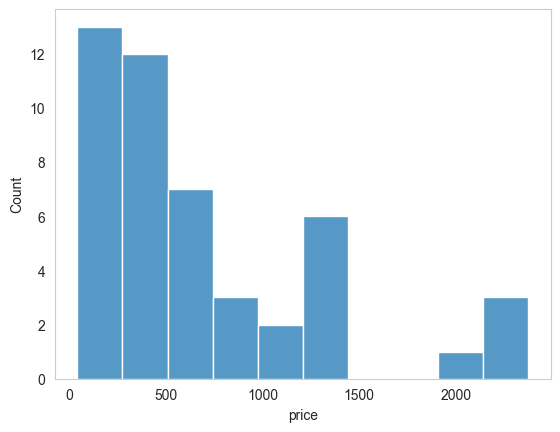

In [225]:
df_bar = df[df.category == 'Bar furniture']
sns.histplot(df_bar.price, bins= 10)
plt.grid();

In [226]:
df.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [18]:
# Check data for null
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [19]:
# Create copy of df, for delete null 
df1 = df.copy()

df1.dropna(inplace= True)

In [21]:
df1.shape

(1899, 14)

In [20]:
df1.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


In [22]:
df1.shape

(1899, 12)

In [23]:
df_X = df1[['height', 'width', 'depth', 'price']]

In [ ]:
# Take SelectKbest to find more informative columns

NameError: name 'df1' is not defined

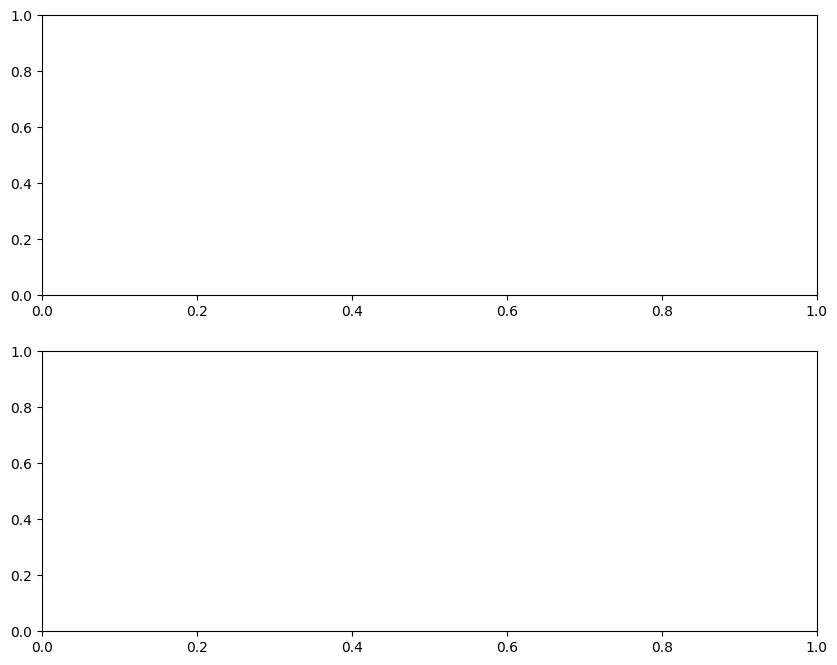

In [4]:
# chi2 - 
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df1[['height', 'width', 'depth', 'price']]
w_df_y = df1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y)
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df1[['height', 'width', 'depth']]
w_df_y_1 = df1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show() # See that width and height important columns

In [24]:
df.old_price.unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

price


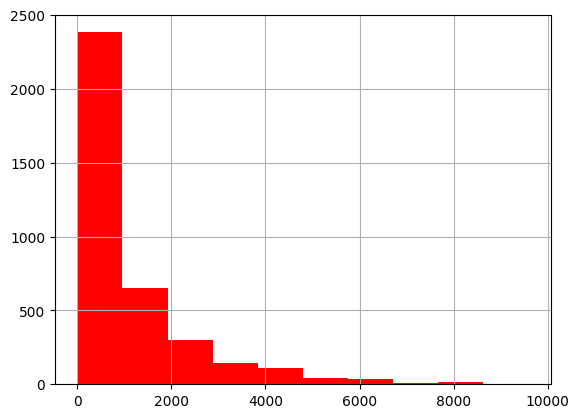

depth


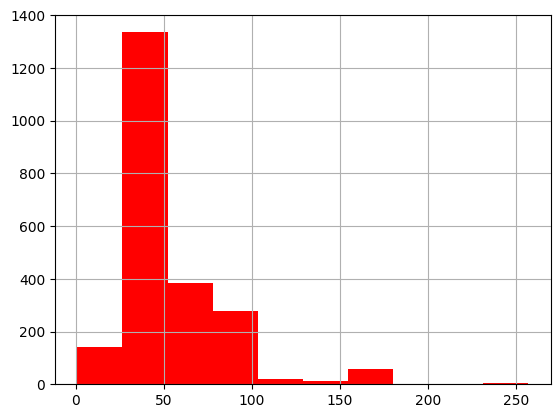

height


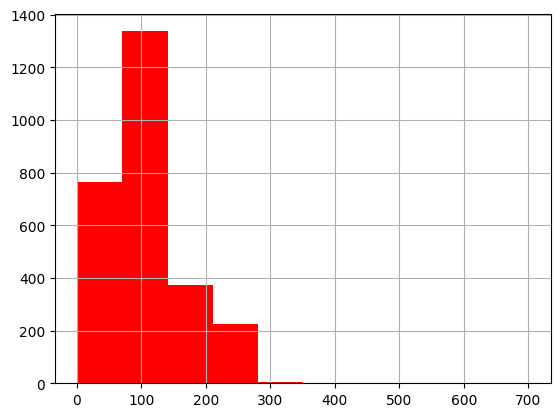

width


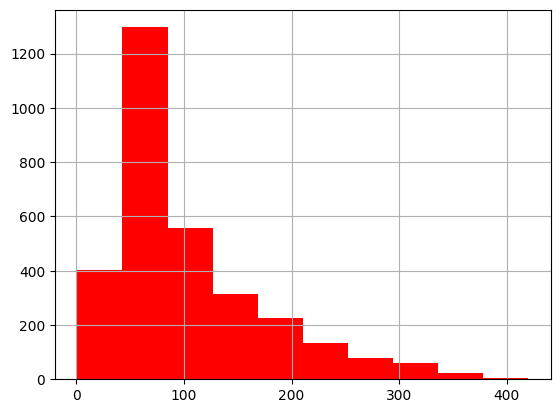

In [25]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col], color = 'red', bins = 10)
    plt.grid()
    plt.show()

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

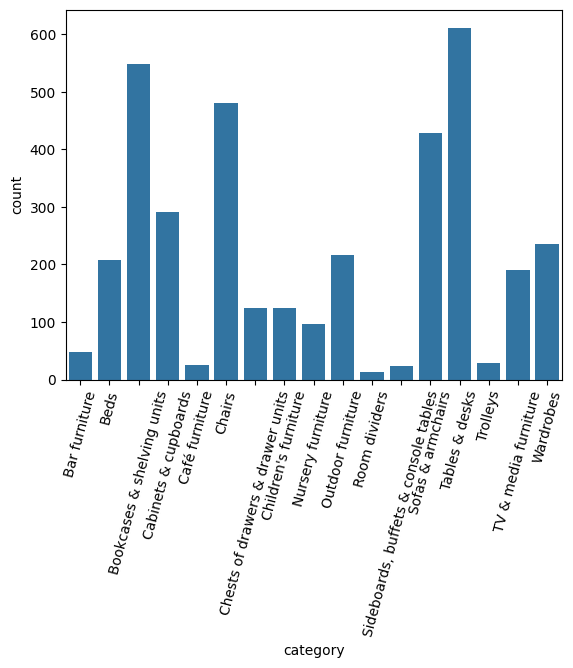

In [23]:
sns.countplot(x = df['category']).set_xticklabels(df['category'].unique(), rotation = 75)

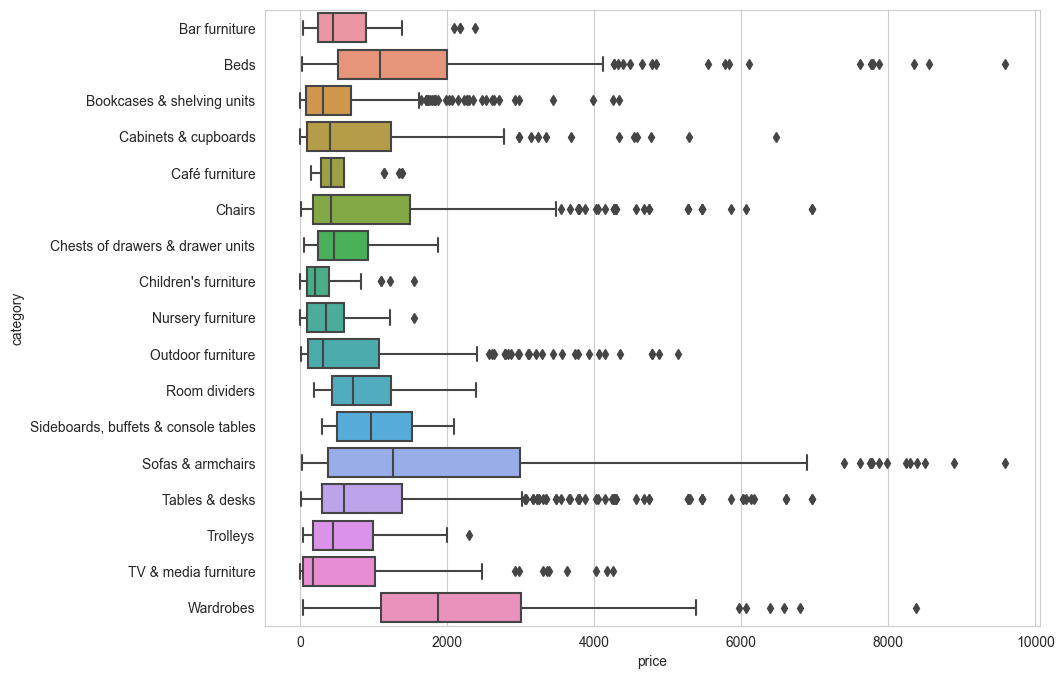

In [244]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'price', y = 'category')
plt.show()

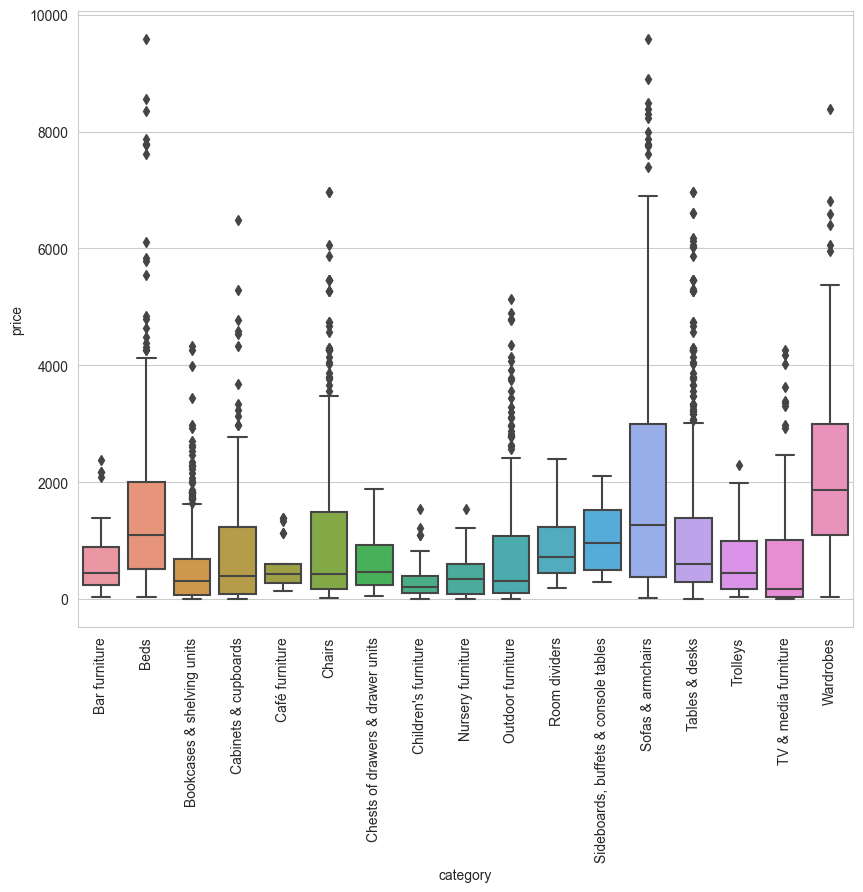

In [245]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'category', y = 'price')
plt.xticks(rotation = 90)
plt.show()

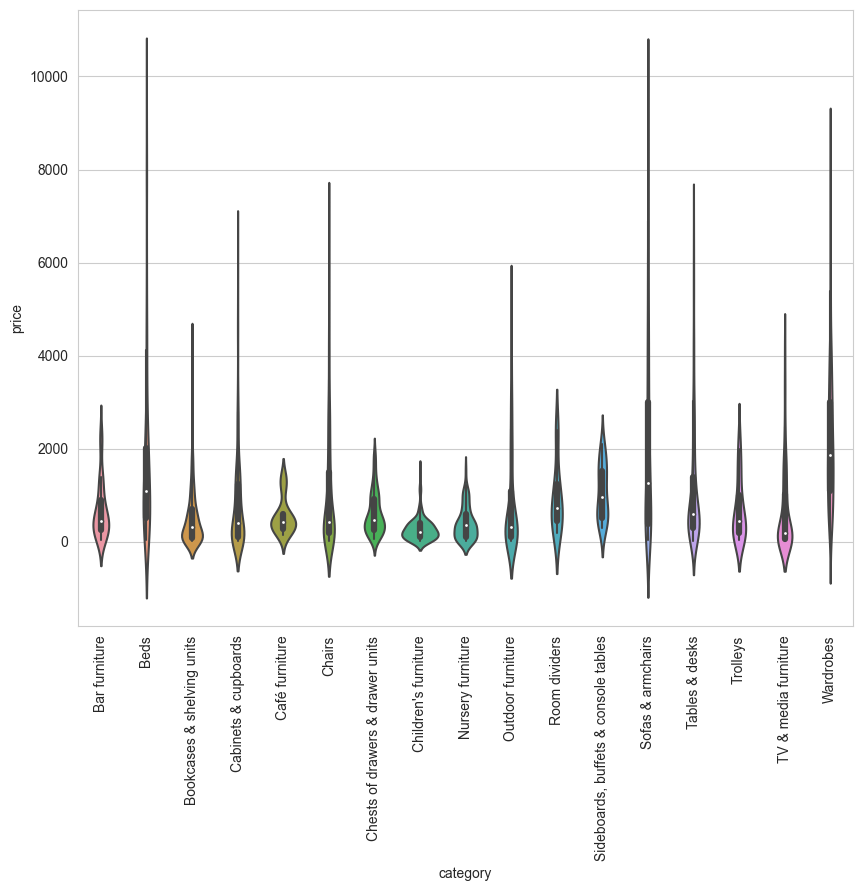

In [246]:
plt.subplots(figsize = (10,8))
sns.violinplot(data = df, y = 'price', x = 'category')
plt.xticks(rotation = 90)
plt.show()

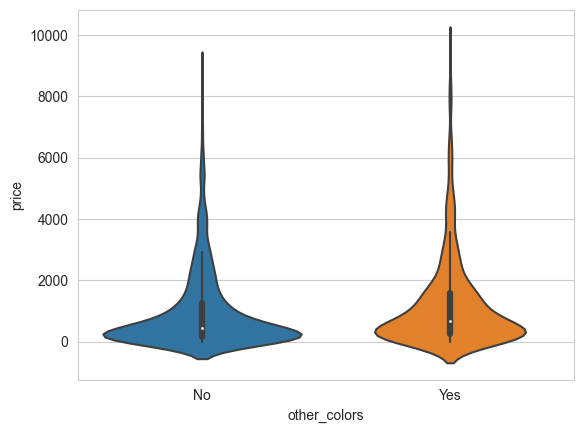

In [247]:
sns.violinplot(data = df, y = 'price', x = 'other_colors')
plt.show()

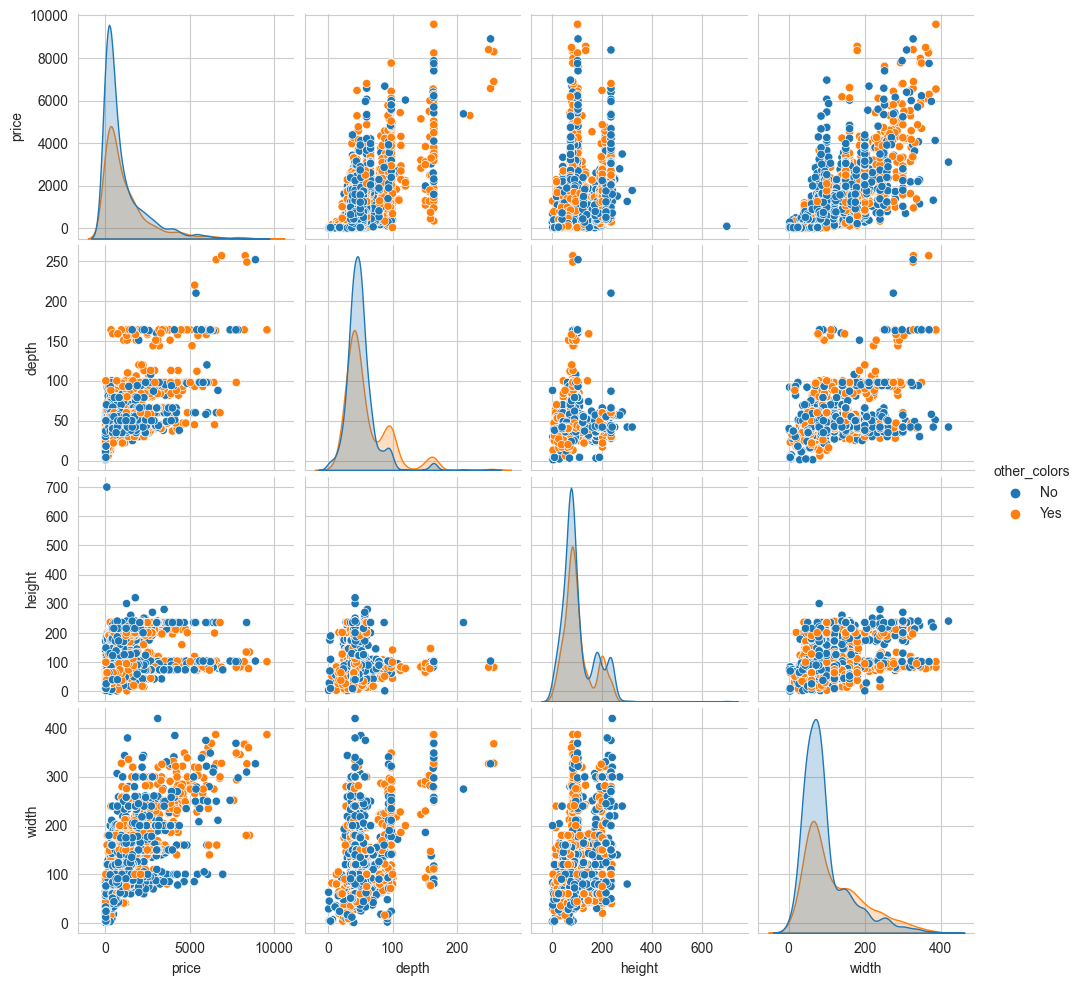

In [248]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

In [250]:
df[['price', 'depth', 'height', 'width']]

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
0,0,FREKVENS,Bar furniture,265.0,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,NORDVIKEN,Bar furniture,995.0,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


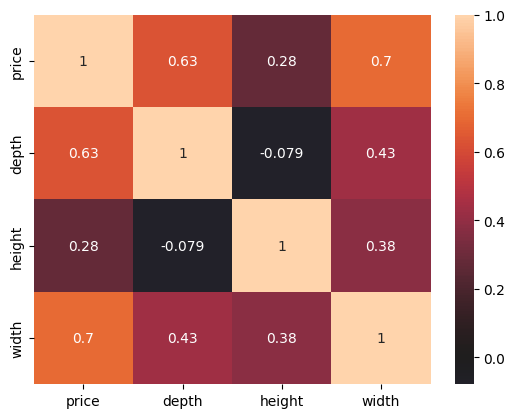

In [27]:
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [26]:
df_X = df1[['height', 'width', 'depth', 'price']]

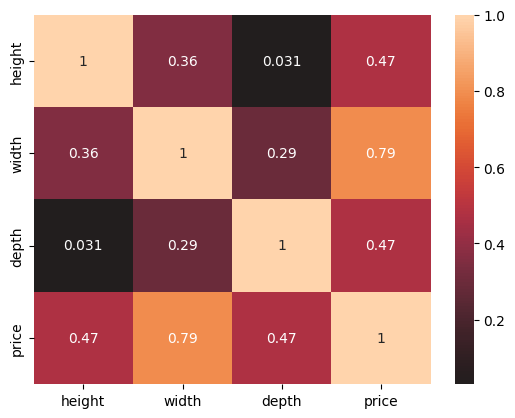

In [27]:
# use diffrent type of heatmap method. use this time Spearman
sns.heatmap(df_X.corr(method= 'spearman'), xticklabels= df_X.corr().columns,
            yticklabels= df_X.corr().columns, center= 0, annot= True);

In [29]:
df['designer'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [30]:
# Create function to clear Designers
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [31]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [32]:
ikea_df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [33]:
ikea_df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
designer_clean          0
dtype: int64

### Build Pipeline for numberic and catefory value
#### Split data for 80 and 20%. 80 - train, 20 - test. 
#### Create pipeline for clean our data, numeric fill median value
#### Category data fill most_frequent
#### Use OneHotEncoder for category value

In [34]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, stratify= Y)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [35]:
ikea_df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'designer_clean'],
      dtype='object')

In [36]:
# Fill in data 
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [37]:
# Function to choose BestRegressor
# Step by step fit data for different model, and display result
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [38]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)
# We can see that RandomForestRegressor have best result for predict price, next step to tunning model 

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68636,468.46870,777.52440
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.64821,487.36937,823.45373
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


In [271]:
from sklearn.model_selection import GridSearchCV
# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

Best Estimator : RandomForestRegressor(max_features='log2')
Best Score     : 0.7794271446546717

R^2            : 0.74805
MAE            : 375.87909
RMSE           : 696.87103

Feature importance:
--------------------------------
0.54109    width_1
0.23939    depth_1
0.21952    height_1


<Axes: >

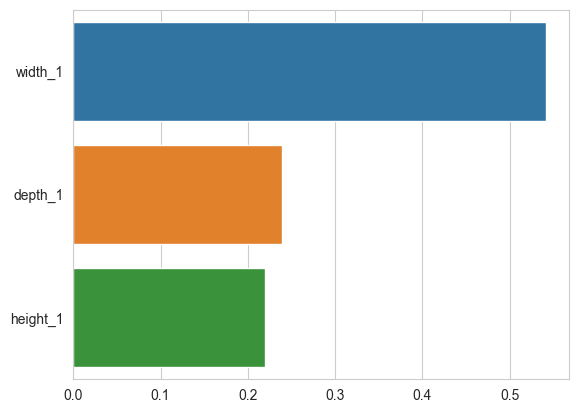

In [272]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)